In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

%matplotlib  inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

import sklearn
from sklearn.metrics import mean_squared_error

In [72]:
df = pd.read_csv(r'C:\Users\a844050\Documents\Github\personal\data_science\forecasting\time_series\datasets\coffee_sales.csv')

# EDA

In [73]:
print(f"{df.shape[0]} Rows & {df.shape[1]} Columns")
print("------")
print(df.dtypes)
df.head(5)

1395 Rows & 6 Columns
------
date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [74]:
print(f"Payment Methods:")
print("------")
print(df['cash_type'].value_counts())
print()
print(f"Coffee Types:")
print("------")
print(df['coffee_name'].value_counts().sort_index())

Payment Methods:
------
cash_type
card    1306
cash      89
Name: count, dtype: int64

Coffee Types:
------
coffee_name
Americano              205
Americano with Milk    336
Cappuccino             230
Cocoa                   46
Cortado                136
Espresso                62
Hot Chocolate           80
Latte                  300
Name: count, dtype: int64


In [75]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df['year_month'] = df.index.to_period('M')

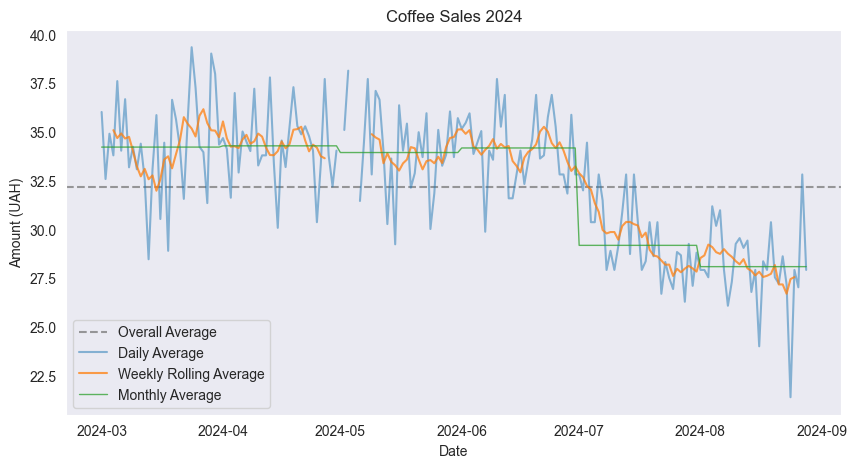

In [65]:
daily_avg = df['money'].resample('D').mean()
weekly_rolling_avg = daily_avg.rolling(window=7, center=True).mean()
monthly_money_avg = df.groupby('year_month')['money'].transform('mean')
monthly_money_avg = pd.DataFrame(monthly_money_avg).reset_index()
monthly_money_avg['month'] = monthly_money_avg['datetime'].dt.to_period('M')
overall_avg = df['money'].mean()

temp = pd.DataFrame(daily_avg).reset_index()
temp['month'] = temp['datetime'].dt.to_period('M')
monthly_avg = pd.merge(left=temp, right=monthly_money_avg, on=['month'], how='left')
monthly_avg.rename(columns={
    'datetime_x': 'datetime',
    'money_y': 'avg_monthly_money'
}, inplace=True)

plt.figure(figsize=(10, 5))

plt.axhline(y=overall_avg, color='grey', alpha=0.8, linestyle='--', label='Overall Average')
plt.plot(daily_avg, alpha=0.5, color='C0', label='Daily Average')
plt.plot(weekly_rolling_avg, color='C1', alpha=0.75, label='Weekly Rolling Average')
plt.plot(monthly_avg['datetime'], monthly_avg['avg_monthly_money'], alpha=0.75, color='C2', lw=1, label='Monthly Average')

plt.xlabel('Date')
plt.ylabel('Amount (UAH)')
plt.title('Coffee Sales 2024')
plt.legend(loc='lower left')
plt.grid(False)

plt.show()

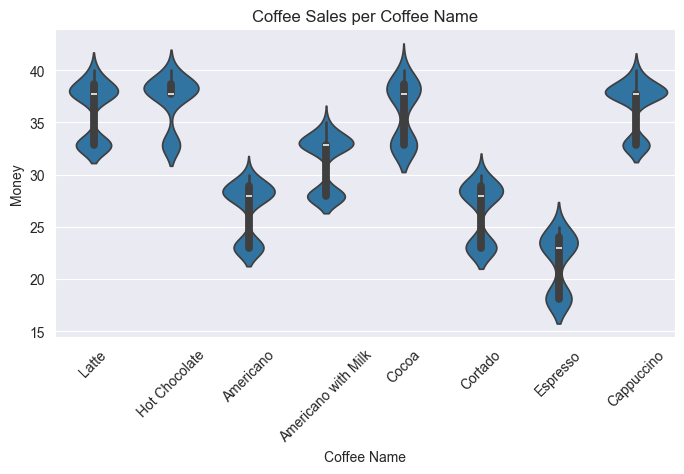

In [76]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='coffee_name', y='money', data=df)
plt.title('Coffee Sales per Coffee Name')
plt.xlabel('Coffee Name')
plt.ylabel('Money')
plt.xticks(rotation=45)

plt.show()

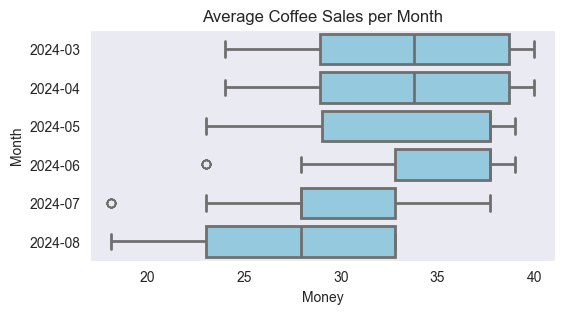

In [79]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='money', y='year_month', data=df, color='skyblue', linewidth=2)
plt.title('Average Coffee Sales per Month')
plt.xlabel('Money')
plt.ylabel('Month')
plt.grid(False)

plt.show()

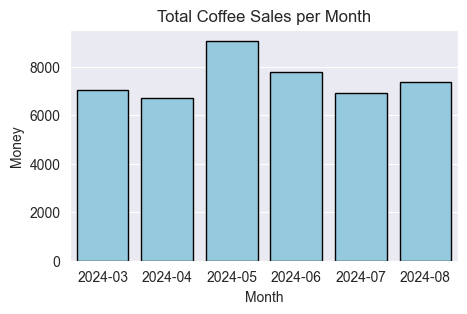

In [80]:
df['month'] = df.index.to_period('M')
monthly_money_sum = df.groupby('month')['money'].aggregate('sum')
monthly_money_sum = pd.DataFrame(monthly_money_sum).reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(data=monthly_money_sum, x='month', y='money', 
            color='skyblue', edgecolor='black', linewidth=1);
plt.title('Total Coffee Sales per Month')
plt.xlabel('Month')
plt.ylabel('Money')
plt.show()

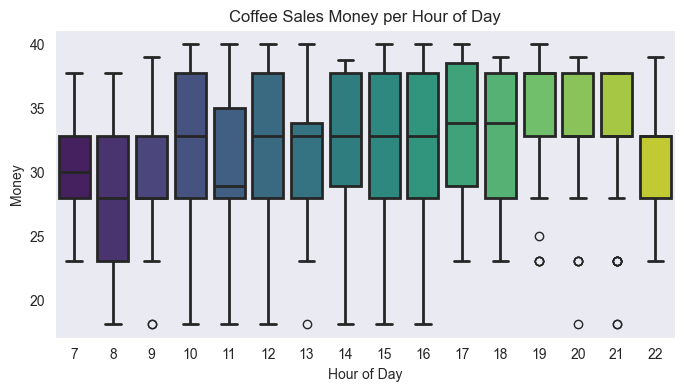

In [81]:
df['hour'] = df.index.hour

plt.figure(figsize=(8, 4))
sns.boxplot(x='hour', y='money', data=df, palette='viridis', linewidth=2)
plt.title('Coffee Sales Money per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Money')
plt.grid(False)

plt.show()

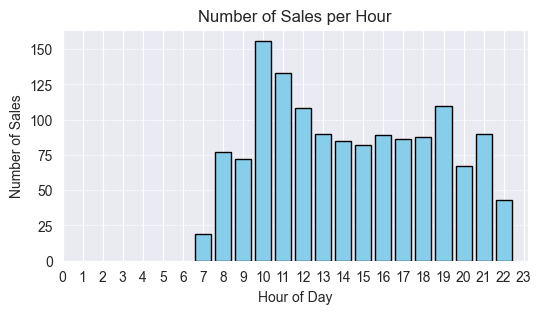

In [82]:
sales_per_hour = df.groupby('hour').size().reset_index(name='sales_count')

plt.figure(figsize=(6, 3))
plt.bar(sales_per_hour['hour'], sales_per_hour['sales_count'], 
            color='skyblue', edgecolor='black', linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [83]:
df['day_of_week'] = df.index.day_name()

daily_hourly_summary = df.groupby(['day_of_week', 'hour'])\
    .agg({'money': ['count', 'sum', 'mean']}).reset_index()
daily_hourly_summary.head(3)

day_of_week hour money                   
                   count     sum       mean
0      Friday    7     4  126.38  31.595000
1      Friday    8     8  223.36  27.920000
2      Friday    9    13  374.04  28.772308

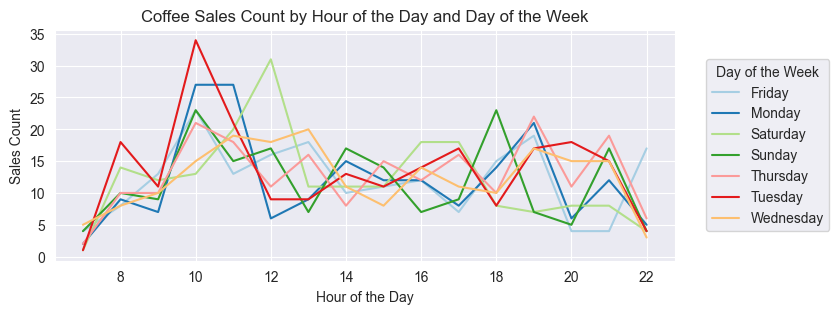

In [84]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'count'), 
             hue='day_of_week', palette='Paired')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.title('Coffee Sales Count by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

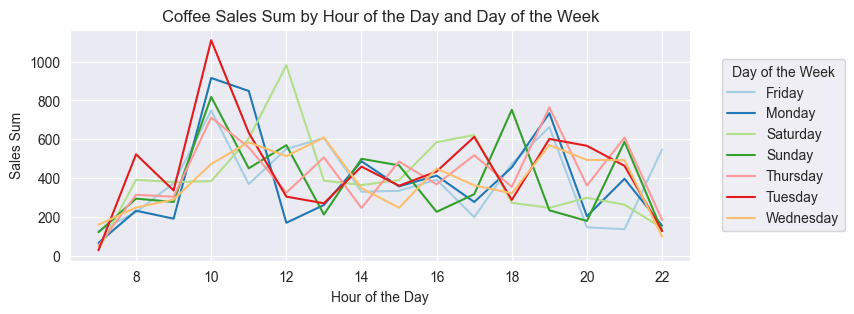

In [85]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'sum'), 
             hue='day_of_week', palette='Paired')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Sum')
plt.title('Coffee Sales Sum by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

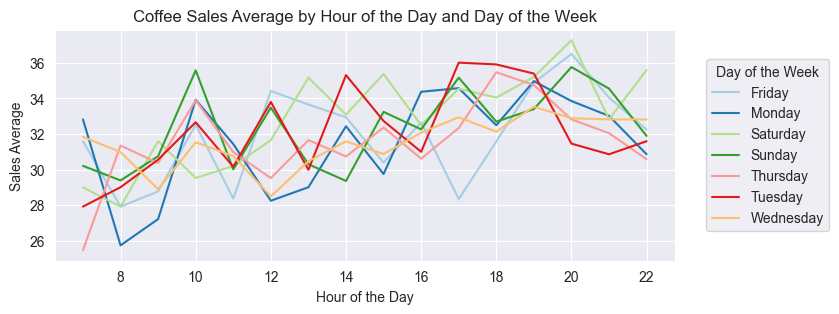

In [86]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'mean'), 
             hue='day_of_week', palette='Paired')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Average')
plt.title('Coffee Sales Average by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');